<a href="https://colab.research.google.com/github/obbcopper/Python-programs-in-Data-Science/blob/main/Score_Predict_GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
# from google.colab import files
# uploaded = files.upload()

dataset student_exam_scores from https://www.kaggle.com/datasets/saadaliyaseen/analyzing-student-academic-trends

In [38]:
# from google.colab import drive
# drive.mount("/content/drive")
df = pd.read_csv("/content/drive/MyDrive/Data/student_exam_scores.csv")
df.head()

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3


In [48]:
def split(df):
    X = df.drop(columns=['student_id','exam_score'])
    y = df['exam_score']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=112)
    return X_train, X_test, y_train, y_test

def norm_scaler(X_train, X_test):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test

In [49]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

In [60]:
models = {
    "Linear Regession": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.05, max_depth=2, random_state=112)
}
results = {}

In [61]:
def show_plt(y_test, predictions):
    plt.figure(figsize=(8,4))
    plt.plot(y_test, color='g', label='Exam scores')
    plt.plot(predictions, color='r', label='Predictions')
    plt.legend()
    plt.show()

def run_model(df):
    X_train, X_test, y_train, y_test = split(df)
    X_train, X_test = norm_scaler(X_train, X_test)


    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred) * 100
        results[name] = round(r2, 2)

    y_pred = pd.DataFrame(y_pred)
    y_test = y_test.reset_index(drop=True)

    print("Model Accuracy (R² Score in %):")
    for model, acc in results.items():
        print(f"{model}: {acc}%")
        show_plt(y_test, y_pred)

Model Accuracy (R² Score in %):
Linear Regession: 84.12%


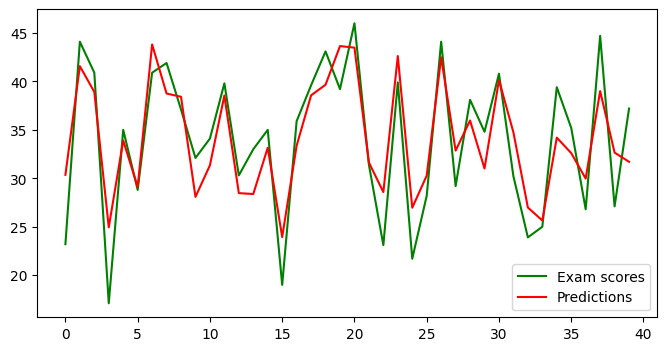

Gradient Boosting: 76.01%


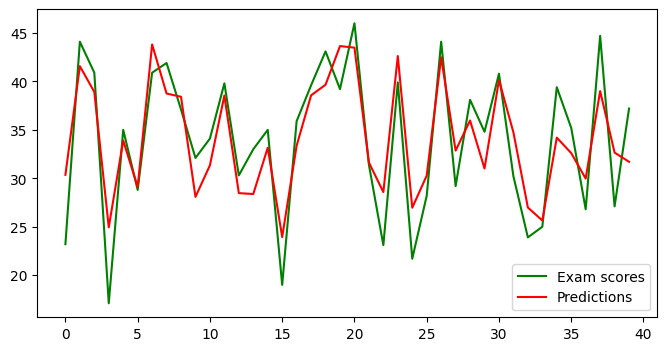

In [62]:
run_model(df)